<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/homeworks/h1/hw_01.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea N°01

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Lucas Daniel Vargas Arroyo

* __Rol__: 201910502-7

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.-  Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de *red*, *green*, *blue*) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

<img src="https://drive.google.com/uc?export=view&id=1-agUvGq-HgBaXC7wkcZAYZ-XDbpJIcSS" width = "400" align="center"/>


Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

Abrir una imagen es tan fácil como:

In [1]:
# librerias
import os
import numpy as np
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Es necesario copiar la ruta de acceso de la imagen para que esta linea funcione
gatito = Image.open("/content/drive/MyDrive/images/gatito.png")

Notar que la variable anterior es de una clase específica de la librería.

In [3]:
type(gatito)

PIL.PngImagePlugin.PngImageFile

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

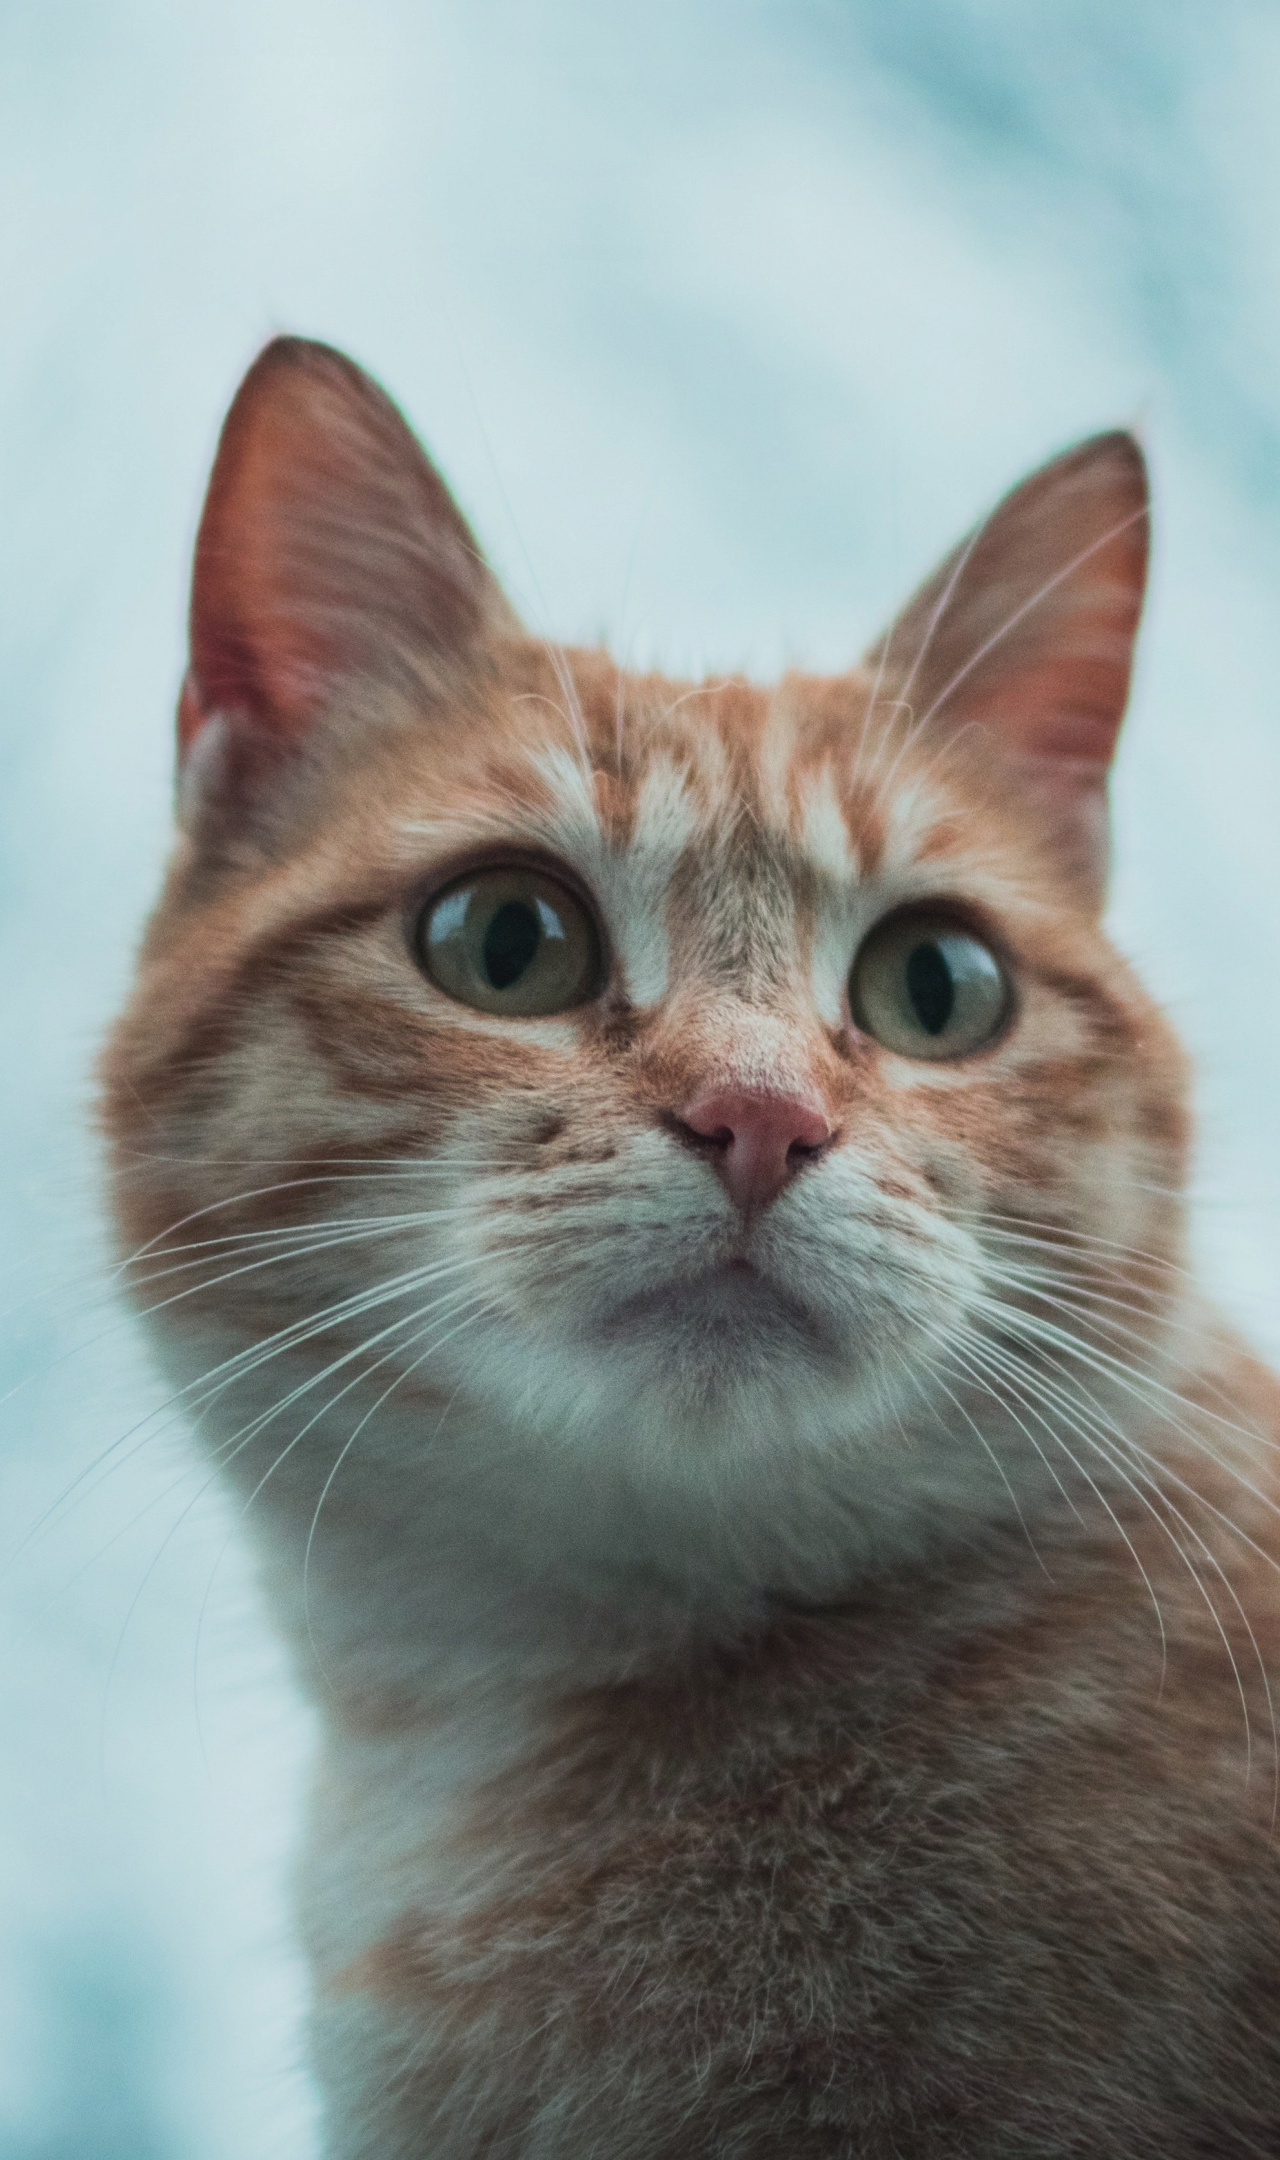

In [4]:
gatito

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [5]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

Dimension de la imagen gatito: (2160, 1280, 3).

Al convertir a np.ndarry el tipo de elementos es uint8.

[[[179 211 215]
  [179 211 215]
  [179 209 215]
  ...
  [171 201 209]
  [171 201 209]
  [169 199 207]]

 [[181 213 217]
  [181 213 217]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [171 201 209]]

 [[179 211 215]
  [179 211 215]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [173 203 211]]

 ...

 [[125 179 190]
  [123 177 188]
  [129 183 194]
  ...
  [ 41  36  33]
  [ 43  38  35]
  [ 45  40  37]]

 [[127 181 192]
  [125 179 190]
  [127 181 192]
  ...
  [ 43  38  37]
  [ 43  38  37]
  [ 45  40  37]]

 [[125 179 190]
  [123 177 188]
  [123 177 188]
  ...
  [ 49  44  43]
  [ 45  40  37]
  [ 43  38  35]]]


### 1.- Encontrando la imagen oculta

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1.1 Crear una lista vacía declarada como `secret_list`.

In [6]:
secret_list = []

1.2 Iterar por cada uno de los canales RGB (`gatito_np.shape[2]`) y en cada iteración:
 * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar.
  - No iterar por filas y columnas.
  - Utilizar la operación módulo `%`.
  - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
        
        
 * Escalar `secret_aux` a valores 0 y 255.
    
 * Cambiar el `dtype` de `secret_aux` a `np.uint8` (utilize el méteodo `astype()`).
            
 * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

**Observación:** recuerde que puede aplicar operaciones directo a un arreglo de numpy.

In [7]:
for channel in range(gatito_np.shape[2]):
    secret_aux = gatito_np[:, :, channel]
    secret_aux = (secret_aux % 2)* 255 #Se determina si es par o impar y se escala a valores 0 y 255
    secret_aux = secret_aux.astype(np.uint8)
    secret_list.append(secret_aux)

In [8]:
print(f"secret_list tiene {len(secret_list)} elementos")

secret_list tiene 3 elementos


1.3 Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [9]:
secret_np = np.hstack(secret_list)
secret_np.shape

(2160, 3840)

1.4 Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [10]:
np.unique(secret_np)

array([  0, 255], dtype=uint8)

In [11]:
secret_np.dtype

dtype('uint8')

In [12]:
secret_img = Image.fromarray(secret_np, mode="L")

Ahora puedes ver el resultado!

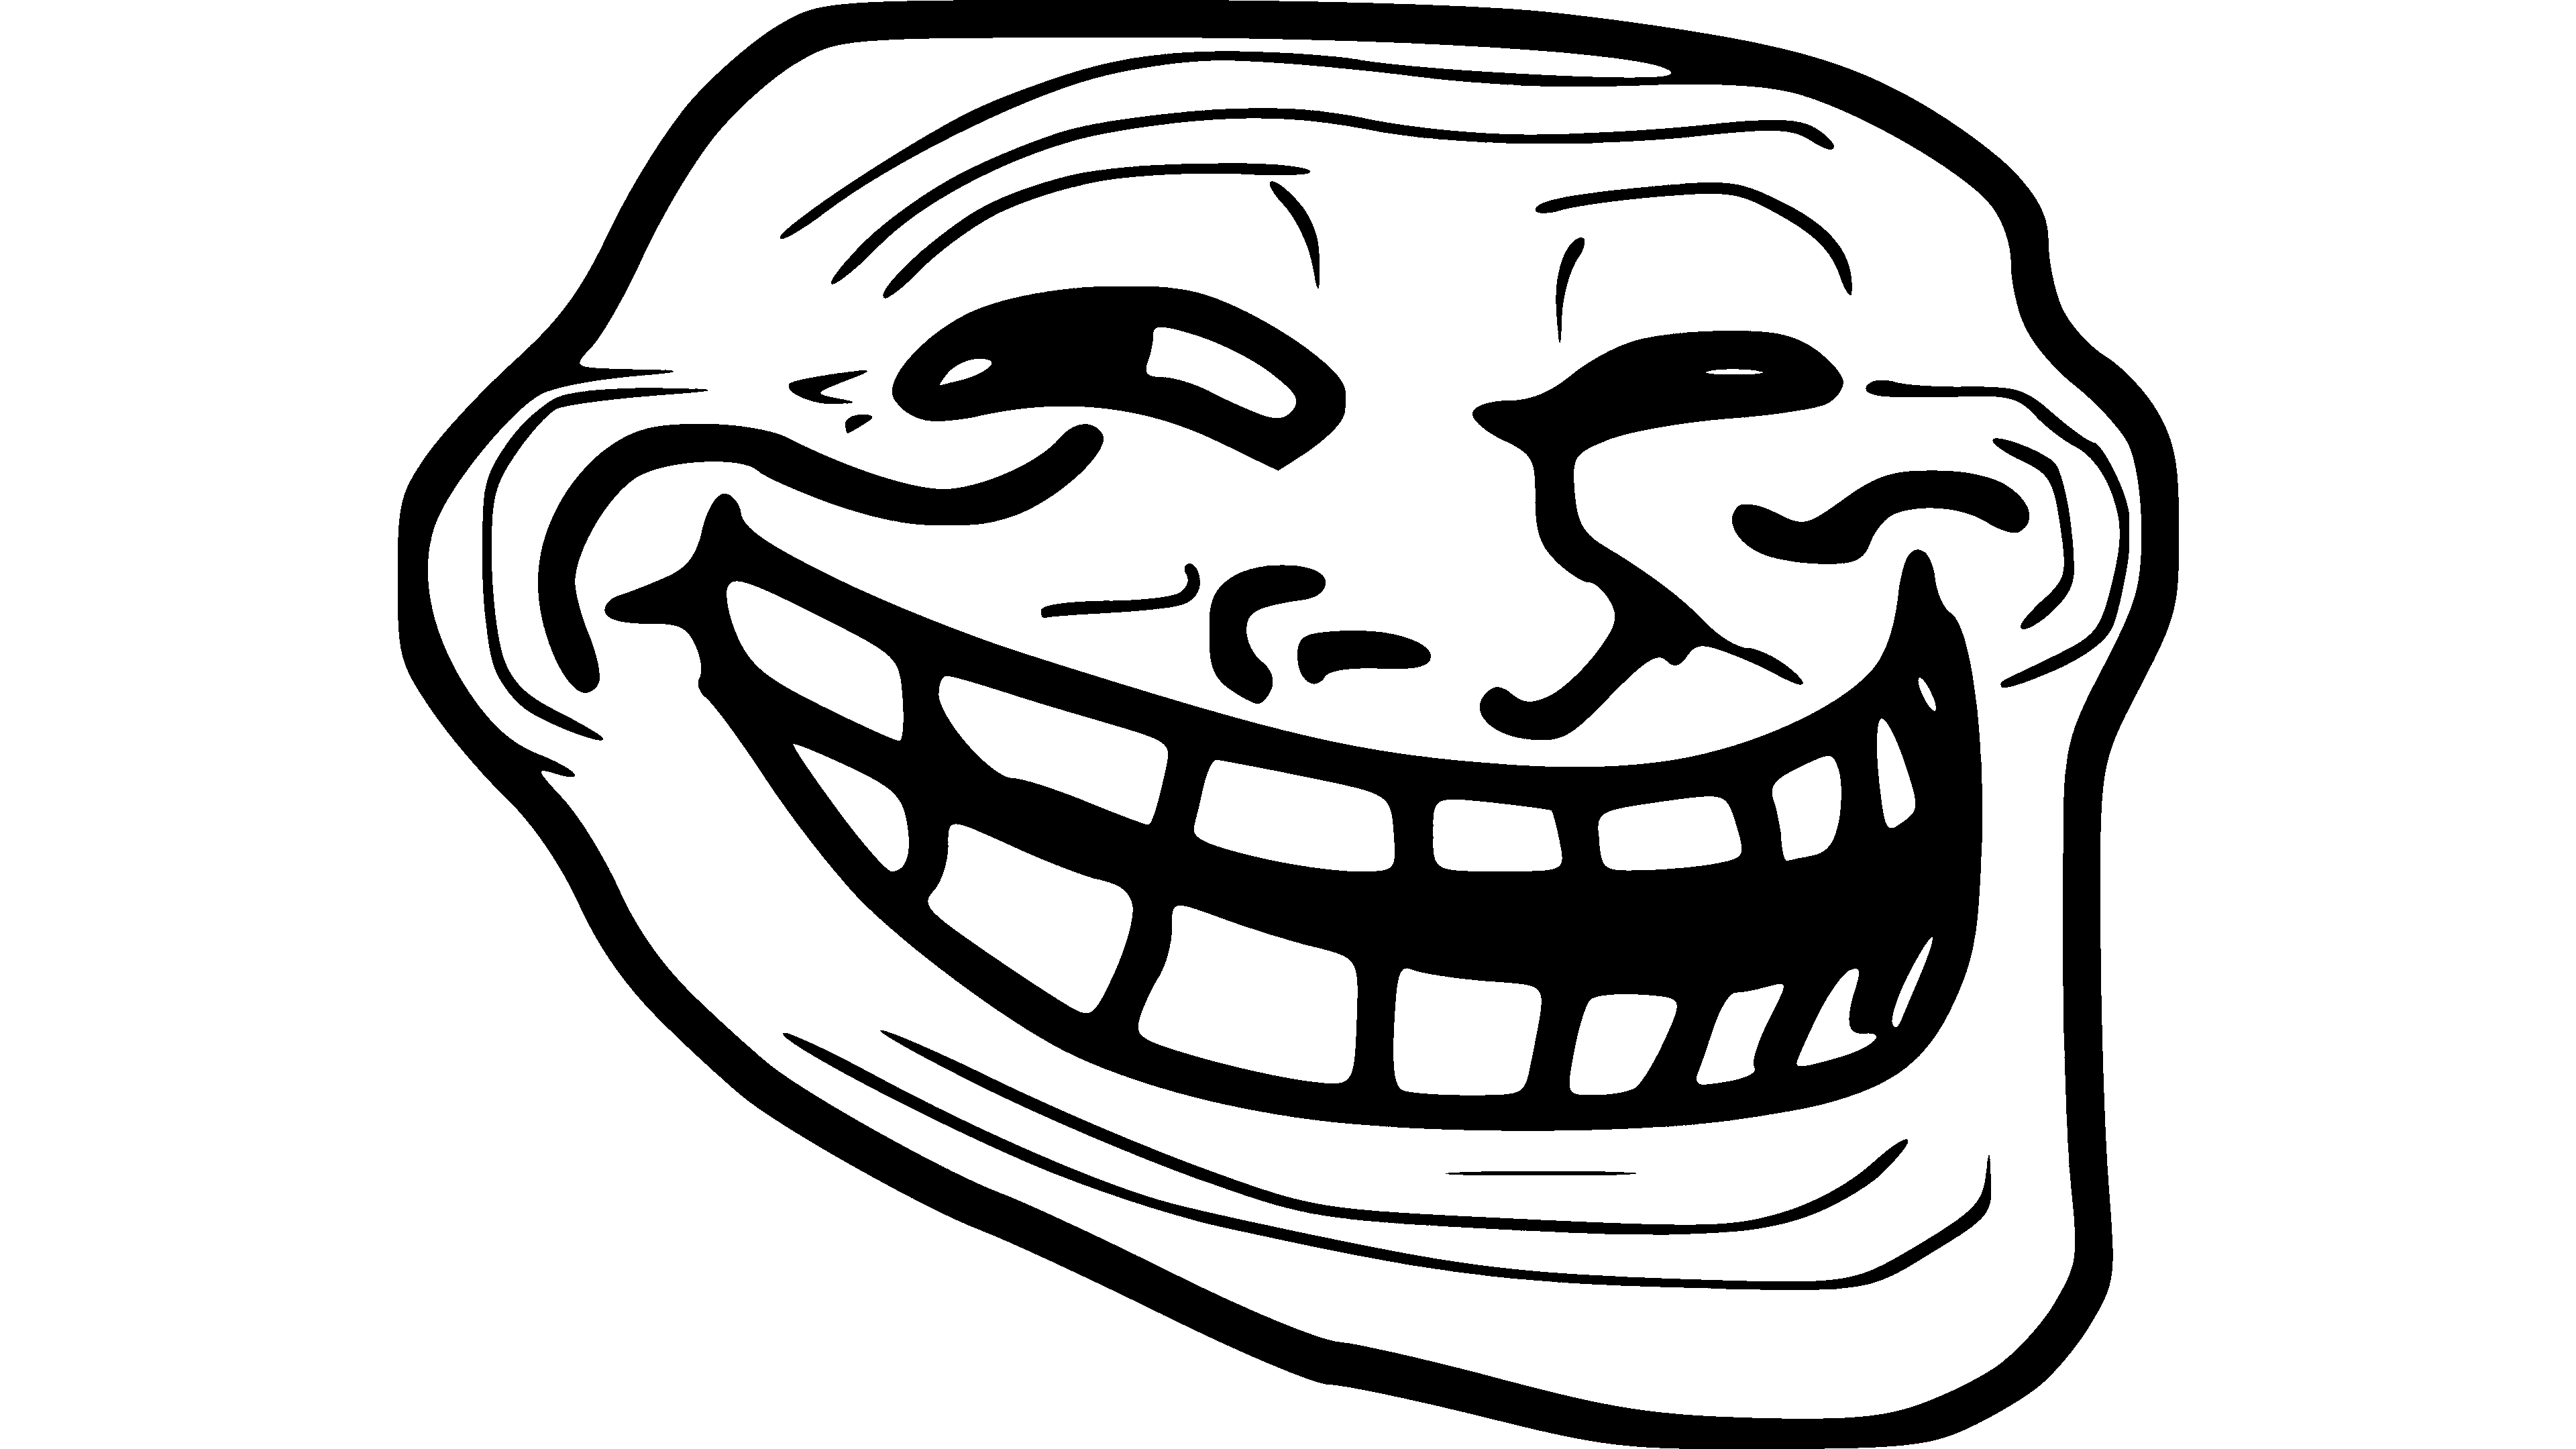

In [13]:
secret_img

### 2.- Escondiendo una nueva imagen

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

2.1 Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [14]:
#Es importante colocar correctamente la ruta de acceso para que esta celda funcione correctamente
my_img = Image.open("/content/drive/MyDrive/images/black_and_white_example.jpg")

2.2 Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

In [15]:
my_img_np = np.array(my_img)
print(my_img_np.shape)

(2160, 3840)


2.3 Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
    - 1: Si el valor del pixel es mayor  al _umbral_.
    - 0: Si el valor del pixel es menor o igual al _umbral_.
    - El `dtype` debe ser `np.uint8`.
    - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [16]:
umbral = 20
my_img_np_aux = (my_img_np > umbral).astype(np.uint8)

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

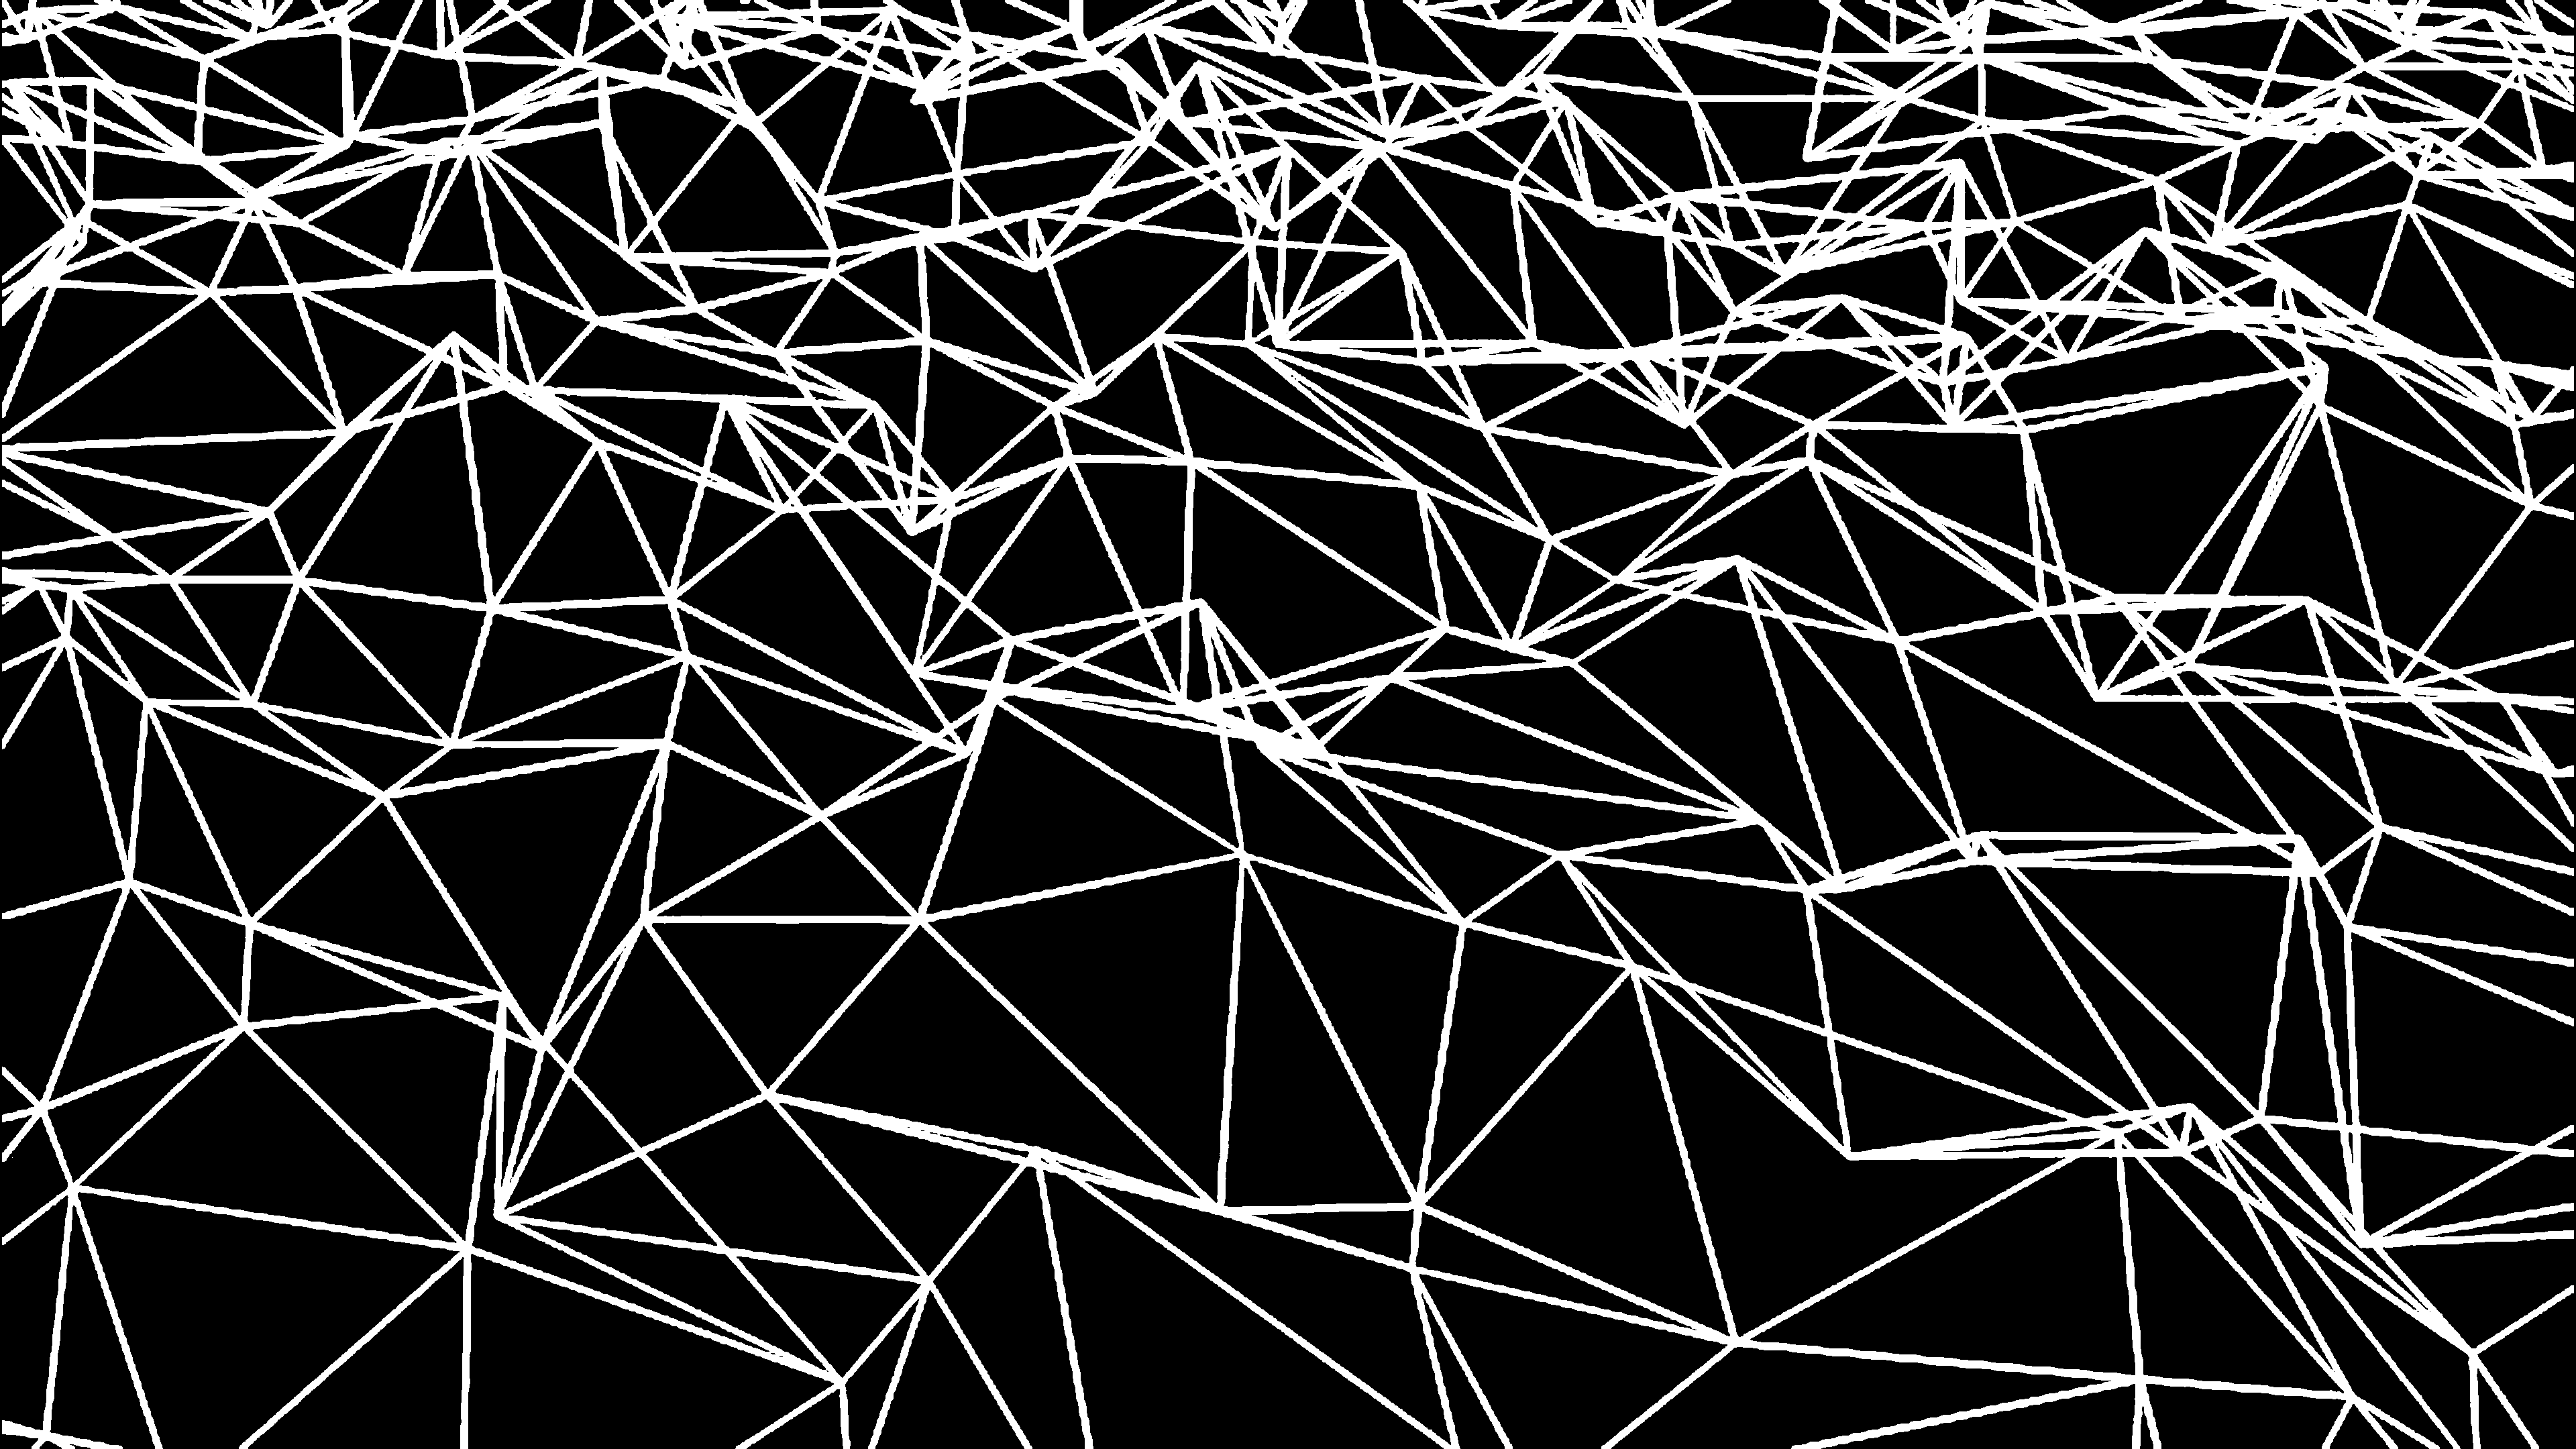

In [17]:
Image.fromarray(my_img_np_aux * 255)

2.4 Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [18]:
p1 = my_img_np_aux[:2160, :1280]
p2 = my_img_np_aux[:2160, 1280:2560]
p3 = my_img_np_aux[:2160, 2560:]
my_img_split = [p1, p2, p3]

Revisa utilizando la siguiente iteración.

In [19]:
for img_array in my_img_split:
    print(img_array.shape)

(2160, 1280)
(2160, 1280)
(2160, 1280)


2.5 La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [20]:
#Es necesario colocar la ruta de acceso de la imagen para que esta celda funcione
cat = Image.open("/content/drive/MyDrive/images/gatito_original.png")
cat_np = np.array(cat)
print(cat_np.shape)

(2160, 1280, 3)


2.6 Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar

In [21]:
#En caso de que los valores sean pares, no sucede nada, pero si son impares se les suma 1
cat_np = cat_np + (cat_np % 2)

2.7 Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [22]:
for channel in range(cat_np.shape[2]):
    cat_np[:, :, channel] += my_img_split[channel]

2.8 Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [23]:
#Es importante reemplazar correctamente la ruta de acceso en la linea 3 para que se ejecute correctamente
cat_secret_im = Image.fromarray(cat_np)
cat_secret_im.save("/content/drive/MyDrive/images/my_secret.png")

2.9 Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte.

In [24]:
def imagenception(filepath):
    # Cargar la imagen a descifrar
    img_descifrar = Image.open(filepath)
    img_np = np.array(img_descifrar)

    # Convertir todos los valores a pares
    img_np = img_np - (img_np % 2)

    # Iterar sobre cada canal RGB
    for channel in range(3):
        # Sumar los valores del canal con el arreglo correspondiente de my_img_split
        img_np[:, :, channel] += my_img_split[channel]

    # Crear la imagen descifrada
    secret_img = Image.fromarray(img_np)

    return secret_img

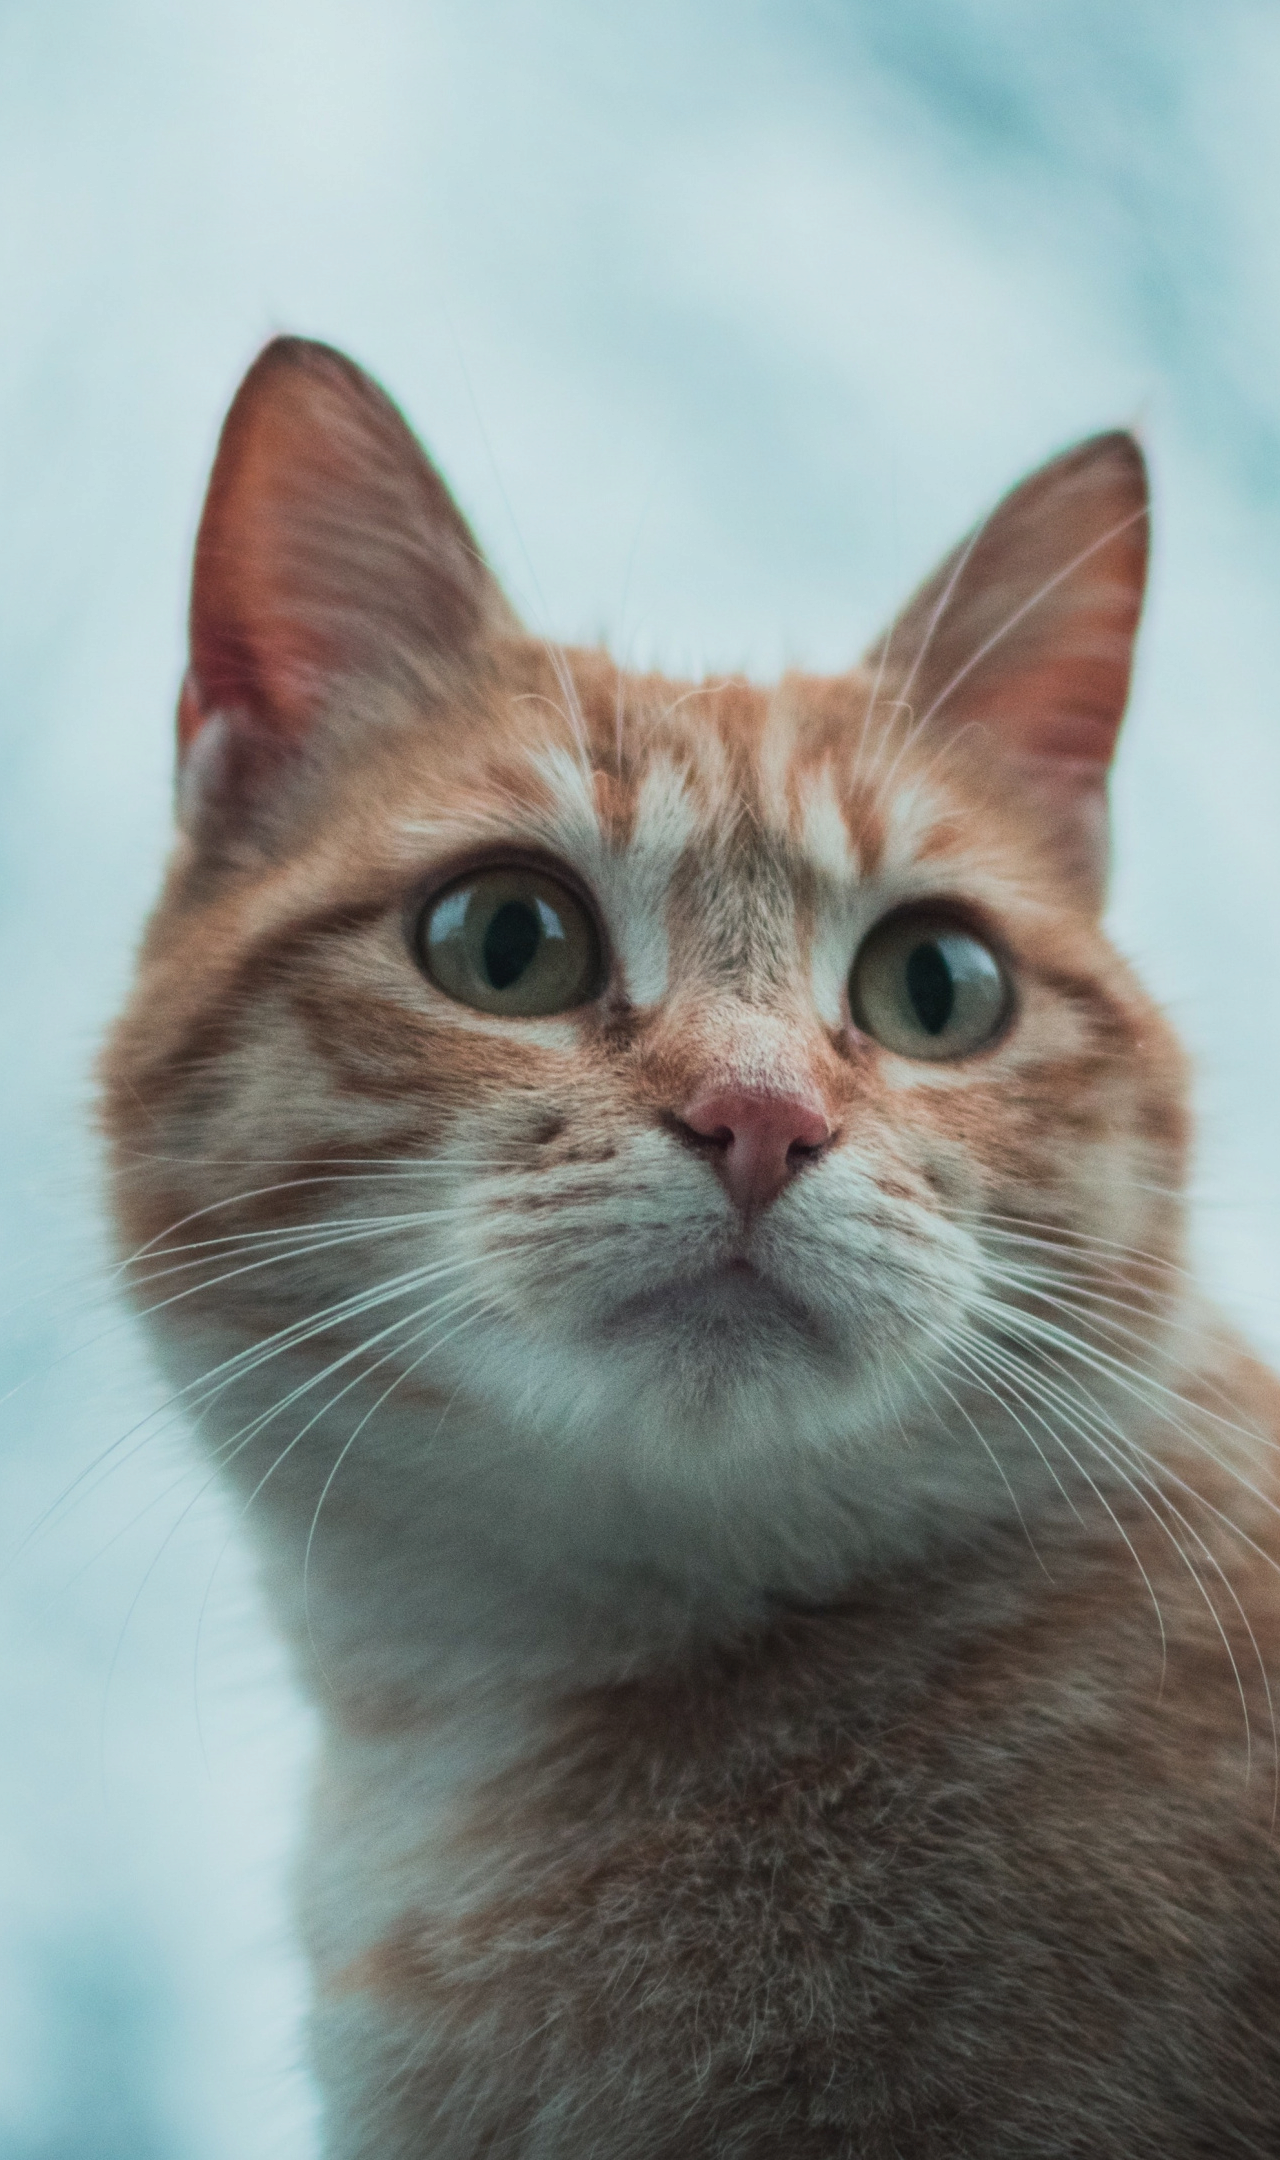

In [25]:
#Es importante reemplazar correctamente la ruta de acceso para que se ejecute correctamente
my_secret_img = imagenception("/content/drive/MyDrive/images/my_secret.png")
my_secret_img

## II.- Analizando la Felicidad

<img src="https://drive.google.com/uc?export=view&id=1sz8zpAcTF6Rod2MgXjHnDEq4kK0dMg7Y" width = "300" align="center"/>

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [26]:
# libraries
import pandas as pd
pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [27]:
# Comprehension dictionary
#Es importante cambiar la ruta de acceso
df_dict = {
    year: pd.read_csv(f"/content/drive/MyDrive/data/world-happiness/{year}.csv").assign(Year=year)
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

Una pequeña descripción de las columnas

* `Country` Name of the country.
* `Region` Region the country belongs to.
* `Happiness Rank` Rank of the country based on the Happiness Score.
* `Happiness Score` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` The standard error of the happiness score.
* `Economy (GDP per Capita)` The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [28]:
from functools import reduce
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist()
print(intersection_columns)

['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Year']


Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__ Se obtiene la intersección a traves del uso de la función intersect1d sobre los valores del diccionario df_dict y se pasa a lista.

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [29]:
happiness = (
    pd.concat(df_dict.values()) #Se concatenan los dataframes que estan en el diccionario
    .reset_index(drop=True) #Se resetean los indices en hapiness
    .loc[:, intersection_columns] #Se seleccionan las columnas
    .rename(columns=lambda x: x.lower().replace(' ', '_').replace('(', '').replace(')', '')) #Se modifican los nombres de las columnas de acuerdo al enunciado
)
happiness.head()

country  dystopia_residual  economy_gdp_per_capita   family  freedom  \
0  Switzerland            2.51738                 1.39651  1.34951  0.66557   
1      Iceland            2.70201                 1.30232  1.40223  0.62877   
2      Denmark            2.49204                 1.32548  1.36058  0.64938   
3       Norway            2.46531                 1.45900  1.33095  0.66973   
4       Canada            2.45176                 1.32629  1.32261  0.63297   

   generosity  happiness_rank  happiness_score  health_life_expectancy  \
0     0.29678               1            7.587                 0.94143   
1     0.43630               2            7.561                 0.94784   
2     0.34139               3            7.527                 0.87464   
3     0.34699               4            7.522                 0.88521   
4     0.45811               5            7.427                 0.90563   

   trust_government_corruption  year  
0                      0.41978  2015  
1                      0.14145  2015  
2                      0.48357  2015  
3                      0.36503  2015  
4                      0.32957  2015

### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [30]:
happiness.describe(include="all").fillna("").T

count unique          top freq         mean  \
country                        470    166  Switzerland    3                
dystopia_residual            470.0                              2.092717   
economy_gdp_per_capita       470.0                               0.92783   
family                       470.0                              0.990347   
freedom                      470.0                              0.402828   
generosity                   470.0                              0.242241   
happiness_rank               470.0                             78.829787   
happiness_score              470.0                              5.370728   
health_life_expectancy       470.0                              0.579968   
trust_government_corruption  470.0                               0.13479   
year                         470.0                           2015.993617   

                                   std      min       25%       50%       75%  \
country                                                                         
dystopia_residual             0.565772  0.32858  1.737975   2.09464  2.455575   
economy_gdp_per_capita        0.415584      0.0  0.605292  0.995439  1.252443   
family                        0.318707      0.0     0.793  1.025665  1.228745   
freedom                       0.150356      0.0  0.297615  0.418347   0.51685   
generosity                    0.131543      0.0  0.152831   0.22314  0.315824   
happiness_rank               45.281408      1.0      40.0      79.0     118.0   
happiness_score               1.136998    2.693     4.509    5.2825   6.23375   
health_life_expectancy        0.240161      0.0  0.402301  0.630053  0.768298   
trust_government_corruption   0.111313      0.0  0.059777  0.099502  0.173161   
year                          0.816907   2015.0    2015.0    2016.0    2017.0   

                                  max  
country                                
dystopia_residual             3.83772  
economy_gdp_per_capita       1.870766  
family                       1.610574  
freedom                       0.66973  
generosity                   0.838075  
happiness_rank                  158.0  
happiness_score                 7.587  
health_life_expectancy        1.02525  
trust_government_corruption   0.55191  
year                           2017.0

¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [31]:
aux = happiness.groupby(['country']) # Se agrupan los datos por pais
country_without = [] # Se genera una lista para guardar los paises sin mediciones

for country in happiness.loc[:,'country']: # Se recorre la columna country
  if aux.size()[country]<3: # Se revisa si estan los datos del pais en los 3 años
    if country not in country_without: # Si el pais no aparece los 3 años se revisa si esta en la lista de paises sin medicion
      country_without.append(country) # Se agrega el pais a la lista de los paises sin medicion
print(country_without)
print(len(country_without))

['Oman', 'Taiwan', 'Suriname', 'Hong Kong', 'Somaliland region', 'Mozambique', 'Lesotho', 'Laos', 'Swaziland', 'Djibouti', 'Comoros', 'Central African Republic', 'Puerto Rico', 'Belize', 'Somalia', 'Somaliland Region', 'Namibia', 'South Sudan', 'Taiwan Province of China', 'Hong Kong S.A.R., China']
20


__Respuesta__: Hay 20 paises sin mediciones de felicidad en los 3 años de estudio y son: Oman, Taiwan, Suriname, Hong Kong, Somaliland region, Mozambique, Lesotho, Laos, Swaziland, Djibouti, Comoros, Central African Republic, Puerto Rico, Belize, Somalia, Somaliland Region, Namibia, South Sudan, Taiwan Province of China, Hong Kong S.A.R., China.

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [32]:
bad_country_names_dict = {"Hong Kong S.A.R., China": "Hong Kong", "Taiwan": 'Taiwan Province of China', 'Somaliland region': 'Somaliland Region'}
happiness = happiness.assign(country = happiness['country'].replace(bad_country_names_dict))
happiness

country  dystopia_residual  economy_gdp_per_capita  \
0                 Switzerland           2.517380                1.396510   
1                     Iceland           2.702010                1.302320   
2                     Denmark           2.492040                1.325480   
3                      Norway           2.465310                1.459000   
4                      Canada           2.451760                1.326290   
..                        ...                ...                     ...   
465                    Rwanda           0.540061                0.368746   
466                     Syria           1.061574                0.777153   
467                  Tanzania           0.621130                0.511136   
468                   Burundi           1.683024                0.091623   
469  Central African Republic           2.066005                0.000000   

       family   freedom  generosity  happiness_rank  happiness_score  \
0    1.349510  0.665570    0.296780               1            7.587   
1    1.402230  0.628770    0.436300               2            7.561   
2    1.360580  0.649380    0.341390               3            7.527   
3    1.330950  0.669730    0.346990               4            7.522   
4    1.322610  0.632970    0.458110               5            7.427   
..        ...       ...         ...             ...              ...   
465  0.945707  0.581844    0.252756             151            3.471   
466  0.396103  0.081539    0.493664             152            3.462   
467  1.041990  0.390018    0.354256             153            3.349   
468  0.629794  0.059901    0.204435             154            2.905   
469  0.000000  0.270842    0.280876             155            2.693   

     health_life_expectancy  trust_government_corruption  year  
0                  0.941430                     0.419780  2015  
1                  0.947840                     0.141450  2015  
2                  0.874640                     0.483570  2015  
3                  0.885210                     0.365030  2015  
4                  0.905630                     0.329570  2015  
..                      ...                          ...   ...  
465                0.326425                     0.455220  2017  
466                0.500533                     0.151347  2017  
467                0.364509                     0.066035  2017  
468                0.151611                     0.084148  2017  
469                0.018773                     0.056565  2017  

[470 rows x 11 columns]

Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [33]:
aux = happiness.groupby(['country']) # Se agrupan los datos por pais
country_without = [] # Se genera una lista para guardar los paises sin mediciones

for country in happiness.loc[:,'country']: # Se recorre la columna country
  if aux.size()[country]<3: # Se revisa si estan los datos del pais en los 3 años
    if country not in country_without: # Si el pais no aparece los 3 años se revisa si esta en la lista de paises sin medicion
      country_without.append(country) # Se agrega el pais a la lista de los paises sin medicion
print(country_without)
print("Existen "+str(len(country_without))+ " paises que no tienen medicion en los 3 años de estudio")

['Oman', 'Suriname', 'Somaliland Region', 'Mozambique', 'Lesotho', 'Laos', 'Swaziland', 'Djibouti', 'Comoros', 'Central African Republic', 'Puerto Rico', 'Belize', 'Somalia', 'Namibia', 'South Sudan']
Existen 15 paises que no tienen medicion en los 3 años de estudio


Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [34]:
pivoted_happiness = happiness.pivot(index='year', columns='country', values='happiness_score').fillna('')

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  En principio podemos visualizar la progresion de los valores de happiness score para cada pais y con respecto a la otra pregunta, no siempre es util pivotear una tabla, este caso es un buen ejemplo de que no es del todo comodo el pivotear una tabla ya que resultan muchas columnas.

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad?

In [35]:
# Agrupar por país y calcular el promedio
promedio_por_pais = happiness.groupby('country')['happiness_score'].mean()

# Ordenar en orden descendente
top_paises = promedio_por_pais.sort_values(ascending=False)

# Seleccionar los tres primeros países
top_tres_paises = top_paises.head(3)

print(top_tres_paises)

country
Switzerland    7.530
Denmark        7.525
Iceland        7.522
Name: happiness_score, dtype: float64


__Respuesta:__  Los 3 paises con el mayor score son Suiza, Dinamarca e Islandia.

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [36]:
hap_mean_factors = happiness.drop(["country",'happiness_score', 'happiness_rank'], axis=1)
hap_mean_factors_by_year = hap_mean_factors.pivot_table(index='year',aggfunc="mean")
hap_mean_factors_by_year

dystopia_residual  economy_gdp_per_capita    family   freedom  \
year                                                                  
2015           2.098977                0.846137  0.991046  0.428615   
2016           2.325807                0.953880  0.793621  0.370994   
2017           1.850238                0.984718  1.188898  0.408786   

      generosity  health_life_expectancy  trust_government_corruption  
year                                                                   
2015    0.237296                0.630259                     0.143422  
2016    0.242635                0.557619                     0.137624  
2017    0.246883                0.551341                     0.123120

Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

In [37]:
# Identificar el factor que contribuye más en promedio para cada año
most_influential_factor = hap_mean_factors_by_year.idxmax(axis=1) # Se busca el factor que mas vale entre las columnas para cada año
max_influence_value = hap_mean_factors_by_year.max(axis=1) # Se busca el valor maximo entre las columnas para cada año

print(max_influence_value)
print(most_influential_factor)

year
2015    2.098977
2016    2.325807
2017    1.850238
dtype: float64
year
2015    dystopia_residual
2016    dystopia_residual
2017    dystopia_residual
dtype: object


__Respuesta:__  
-En 2015: dystopia_residual

-En 2016: dystopia_residual

-En 2017: dystopia_residual

### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [38]:
# Es importante reemplazar correctamente
suicide = pd.read_csv("/content/drive/MyDrive/data/world-happiness/suicide_rates.csv")
suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [39]:
suicide.describe(include="all").fillna("").T

count unique            top   freq            mean  \
country               27820    101      Mauritius    382                   
year                27820.0                                  2001.258375   
sex                   27820      2           male  13910                   
age                   27820      6    15-24 years   4642                   
suicides_no         27820.0                                   242.574407   
population          27820.0                               1844793.617398   
suicides/100k pop   27820.0                                    12.816097   
country-year          27820   2321    Albania1987     12                   
HDI for year         8364.0                                     0.776601   
 gdp_for_year ($)     27820   2321  2,156,624,900     12                   
gdp_per_capita ($)  27820.0                                 16866.464414   
generation            27820      6   Generation X   6408                   

                               std     min      25%       50%         75%  \
country                                                                     
year                      8.469055  1985.0   1995.0    2002.0      2008.0   
sex                                                                         
age                                                                         
suicides_no             902.047917     0.0      3.0      25.0       131.0   
population          3911779.441756   278.0  97498.5  430150.0  1486143.25   
suicides/100k pop        18.961511     0.0     0.92      5.99       16.62   
country-year                                                                
HDI for year              0.093367   0.483    0.713     0.779       0.855   
 gdp_for_year ($)                                                           
gdp_per_capita ($)    18887.576472   251.0   3447.0    9372.0     24874.0   
generation                                                                  

                           max  
country                         
year                    2016.0  
sex                             
age                             
suicides_no            22338.0  
population          43805214.0  
suicides/100k pop       224.97  
country-year                    
HDI for year             0.944  
 gdp_for_year ($)               
gdp_per_capita ($)    126352.0  
generation

Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [40]:
# Es posible hacer todas las operaciones encadenadas!
suicides_agg = (
    suicide.groupby(['country', 'year'])
    .agg(
      {'population': 'sum', 'suicides_no': 'sum'}
    )
    .reset_index()
    .assign(
        suicides_ratio_100k= lambda x: (x['suicides_no'] / x['population']) * 100000,
        suicides_rank= lambda x: x.groupby('year')['suicides_ratio_100k'].rank(ascending=False)
    )
)
display(suicides_agg)

country  year  population  suicides_no  suicides_ratio_100k  \
0        Albania  1987     2709600           73             2.694125   
1        Albania  1988     2764300           63             2.279058   
2        Albania  1989     2803100           68             2.425886   
3        Albania  1992     2822500           47             1.665190   
4        Albania  1993     2807300           73             2.600363   
...          ...   ...         ...          ...                  ...   
2316  Uzbekistan  2010    25651783         1464             5.707206   
2317  Uzbekistan  2011    25978049         1640             6.313022   
2318  Uzbekistan  2012    26381830         1835             6.955545   
2319  Uzbekistan  2013    26838924         1950             7.265567   
2320  Uzbekistan  2014    27313507         2095             7.670198   

      suicides_rank  
0              44.0  
1              47.0  
2              47.0  
3              61.0  
4              59.0  
...             ...  
2316           60.0  
2317           57.0  
2318           53.0  
2319           51.0  
2320           49.0  

[2321 rows x 6 columns]

Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [41]:
hap_sui = happiness.merge(suicides_agg, on=['country', 'year'], how='inner')
hap_sui.head()

country  dystopia_residual  economy_gdp_per_capita   family  freedom  \
0  Switzerland            2.51738                 1.39651  1.34951  0.66557   
1      Iceland            2.70201                 1.30232  1.40223  0.62877   
2      Denmark            2.49204                 1.32548  1.36058  0.64938   
3       Norway            2.46531                 1.45900  1.33095  0.66973   
4      Finland            2.61955                 1.29025  1.31826  0.64169   

   generosity  happiness_rank  happiness_score  health_life_expectancy  \
0     0.29678               1            7.587                 0.94143   
1     0.43630               2            7.561                 0.94784   
2     0.34139               3            7.527                 0.87464   
3     0.34699               4            7.522                 0.88521   
4     0.23351               6            7.406                 0.88911   

   trust_government_corruption  year  population  suicides_no  \
0                      0.41978  2015     7892502         1073   
1                      0.14145  2015      308554           40   
2                      0.48357  2015     5383060          564   
3                      0.36503  2015     4882909          590   
4                      0.41372  2015     5181797          731   

   suicides_ratio_100k  suicides_rank  
0            13.595182           22.0  
1            12.963695           24.0  
2            10.477312           31.0  
3            12.082961           26.0  
4            14.107075           18.0

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

In [42]:
hap_sui.loc[:, ["happiness_rank", "suicides_rank"]].corr()

happiness_rank  suicides_rank
happiness_rank        1.000000       0.038896
suicides_rank         0.038896       1.000000

Respuesta: La correlacion lineal es de 0.038896

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

In [43]:
correlation_by_year = hap_sui.groupby('year')
correlation_by_year[['happiness_rank', 'suicides_rank']].corr()

happiness_rank  suicides_rank
year                                              
2015 happiness_rank        1.000000       0.101215
     suicides_rank         0.101215       1.000000
2016 happiness_rank        1.000000       0.022048
     suicides_rank         0.022048       1.000000

__Respuesta:__  En 2015 hay una correlacion lineal de 0.101215 y en 2016 hay una correlacion lineal de 0.022048

¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

In [44]:
correlation_by_year[['happiness_score', 'suicides_ratio_100k']].corr()

happiness_score  suicides_ratio_100k
year                                                          
2015 happiness_score             1.000000             0.035262
     suicides_ratio_100k         0.035262             1.000000
2016 happiness_score             1.000000             0.025924
     suicides_ratio_100k         0.025924             1.000000

__Respuesta:__  Los valores varian de forma similar, es decir, en 2015 existe una correlacion lineal de 0.035262 y esta baja a 0.025924 en 2016, sin embargo, la magnitud del cambio es menor.

### III.- Índices de Costos de Vida

<img src="https://drive.google.com/uc?export=view&id=1Z6TwXW6AanUXYM-cHULs1dZbxDJ2eN_o" width = "300" align="center"/>


Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio.

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar:

In [45]:
# instalar lxml
!pip install lxml

Se disponibiliza a continuación la carga de datos de un dataframe.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [47]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[1]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                 163.6       120.0   
1  2015     2  Geneva, Switzerland                 145.2        81.5   
2  2015     3   Caracas, Venezuela                 141.4        60.5   
3  2015     4  Zurich, Switzerland                 141.1        66.4   
4  2015     5       Tromso, Norway                 131.4        55.8   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                           142.3            191.7                   132.9   
1                           114.0            161.1                   141.2   
2                           101.9            155.2                   122.3   
3                           104.6            148.6                   146.9   
4                            94.5            127.7                   137.1   

   local_purchasing_power_index  
0                          69.8  
1                         130.2  
2                           9.7  
3                         133.9  
4                         132.4

### Ejercicio 3.1

Explique lo que se hizo en la celda anterior detalladamente.

Respuesta: -Se hace un ciclo a traves de los años para leer una tabla de datos sacada directamente de la URL.

-Luego cambia el nombre de las columnas de la tabla, cambiando mayusculas por minusculas y reemplazando los espacios en blanco por guiones bajos.

-Se agrega una columna rank a modo de indice desde el 1.

-Se almacena toda esa info en un dataframe por año.

-Todos estos dataframes se concatenan y se hace un rename a las columnas "year" y "rank".

-Finalmente se resetea el index para que se ordenen los datos.

### Ejercicio 3.2

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

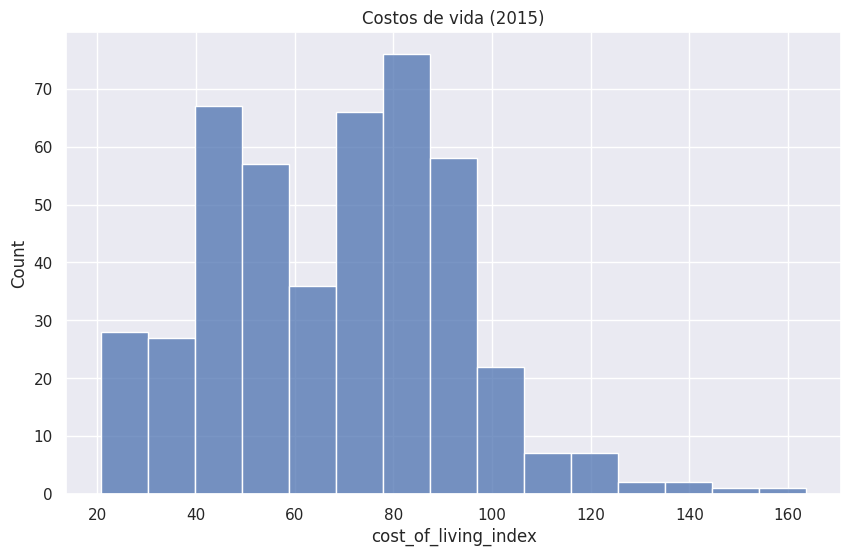

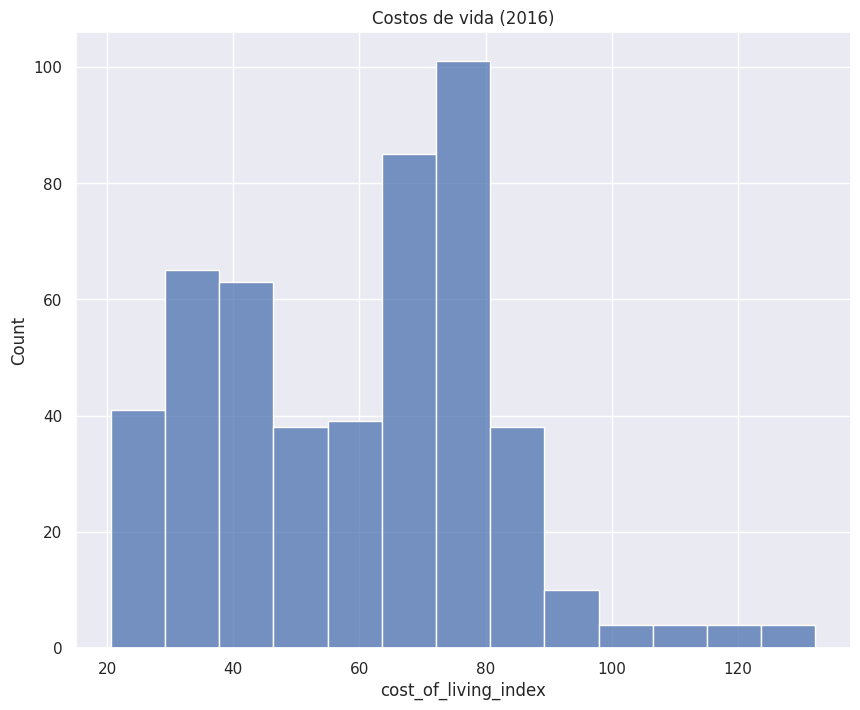

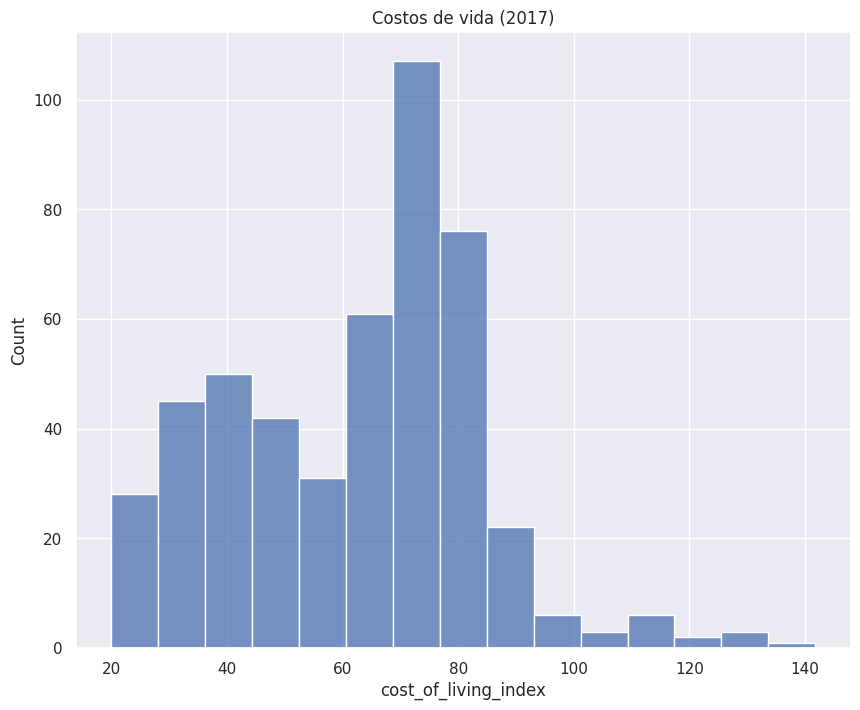

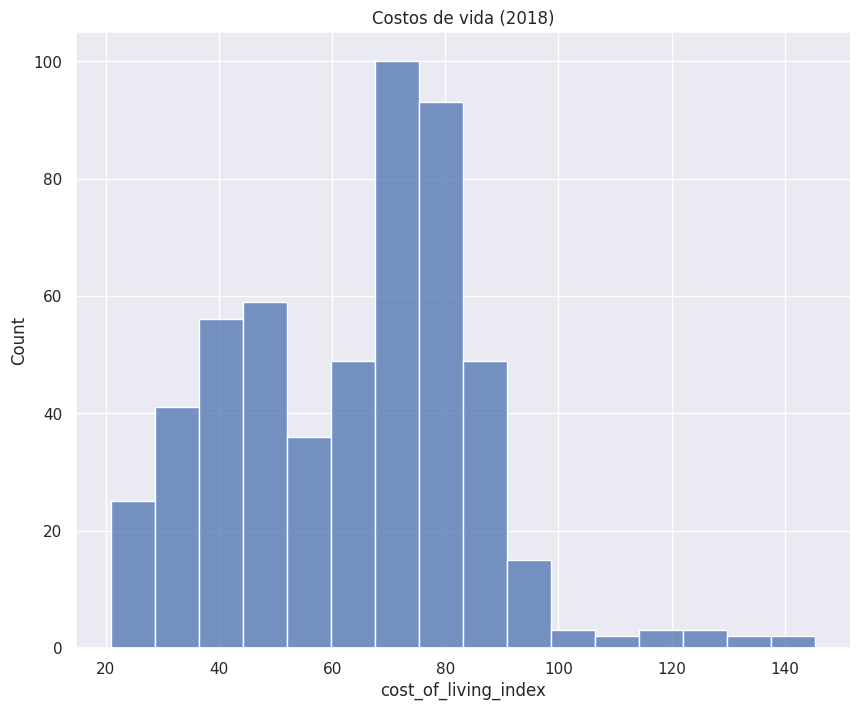

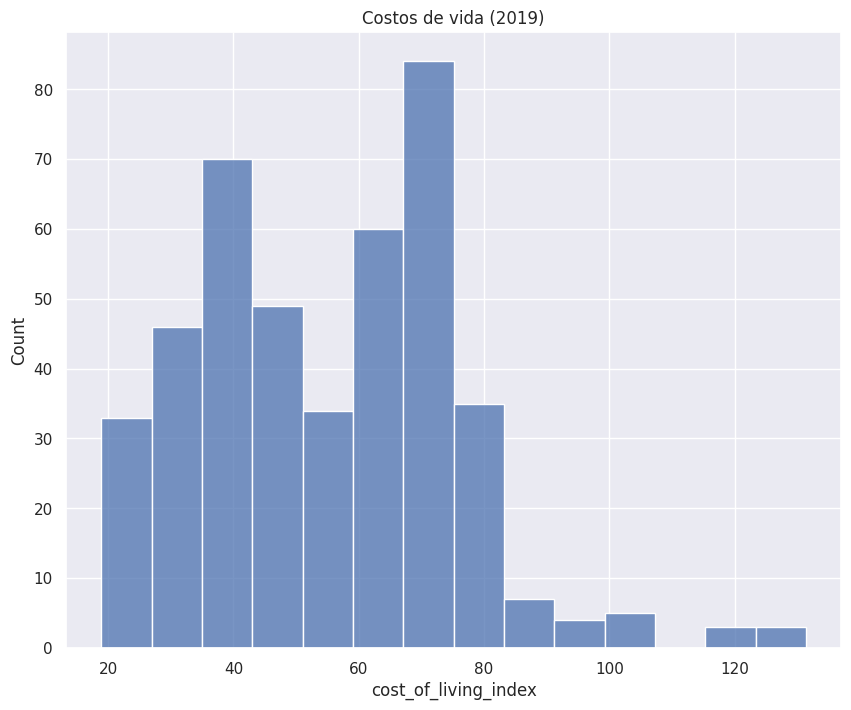

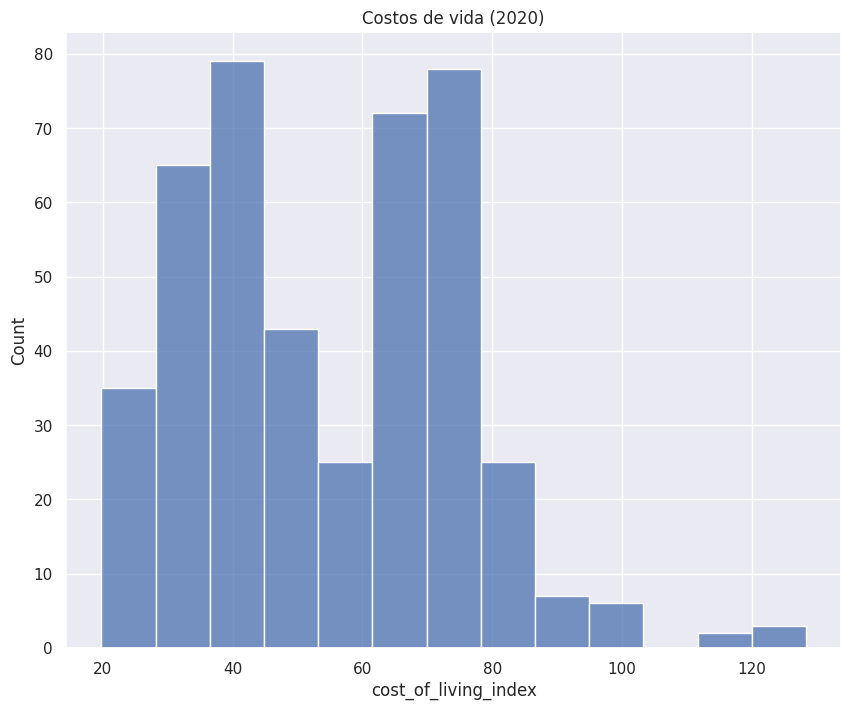

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

#Creamos un histograma fijando el año para cada uno de los graficos
plt.figure(figsize=(10, 6))
df_aux = life_cost[life_cost["year"] == 2015]
sns.histplot(df_aux.cost_of_living_index)
plt.title("Costos de vida (2015)")
plt.show()
print("\n")
df_aux = life_cost[life_cost["year"] == 2016]
sns.histplot(df_aux.cost_of_living_index)
plt.title("Costos de vida (2016)")
plt.show()
print("\n")
df_aux = life_cost[life_cost["year"] == 2017]
sns.histplot(df_aux.cost_of_living_index)
plt.title("Costos de vida (2017)")
plt.show()
print("\n")
df_aux = life_cost[life_cost["year"] == 2018]
sns.histplot(df_aux.cost_of_living_index)
plt.title("Costos de vida (2018)")
plt.show()
print("\n")
df_aux = life_cost[life_cost["year"] == 2019]
sns.histplot(df_aux.cost_of_living_index)
plt.title("Costos de vida (2019)")
plt.show()
print("\n")
df_aux = life_cost[life_cost["year"] == 2020]
sns.histplot(df_aux.cost_of_living_index)
plt.title("Costos de vida (2020)")
plt.show()

Respuesta: Podemos concluir que la mayoria de los datos estan entre 20 y 80, ademas que sobre 100 existen muy pocos datos.

### Ejercicio 3.3

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [49]:
rol_seed = 201110002  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values
my_cities

array(['Nicosia, Cyprus', 'Bali, Indonesia',
       'Los Angeles, CA, United States', 'Vadodara, India',
       'Virginia Beach, VA, United States',
       'Huntsville, AL, United States', 'Tokyo, Japan', 'Aachen, Germany',
       'Podgorica, Montenegro', 'Bloomington, IN, United States'],
      dtype=object)

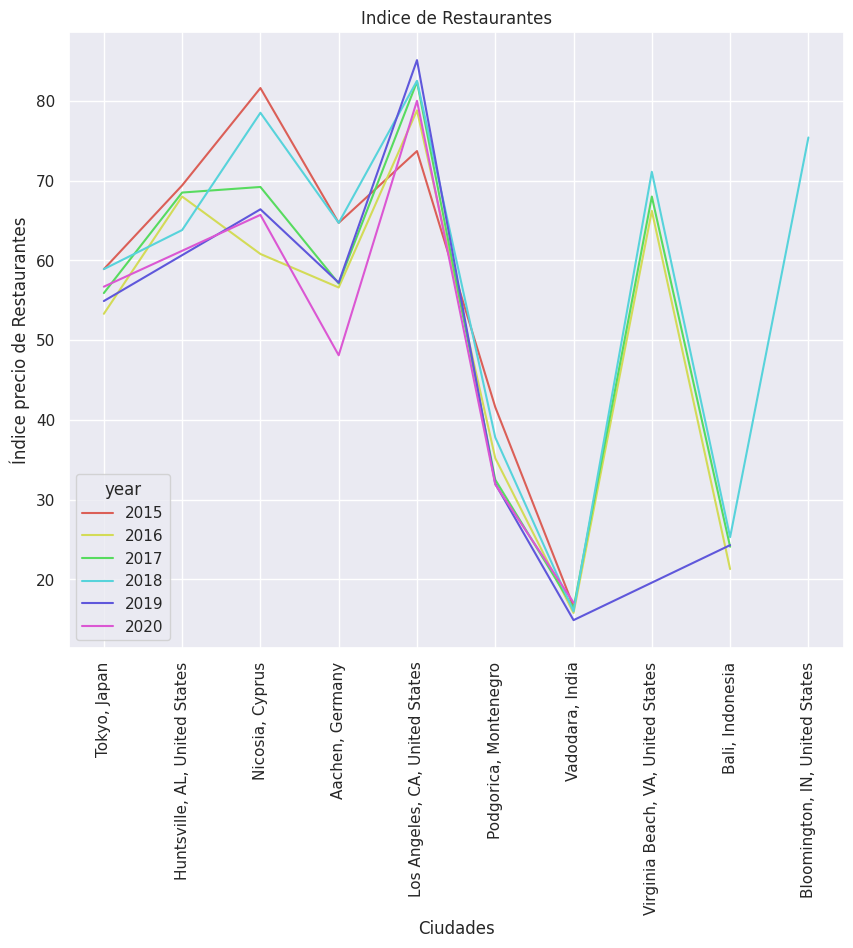

In [50]:
palette = sns.color_palette("hls", len(years))
sns.lineplot(
    x = 'city',
    y = 'restaurant_price_index',
    data = life_cost[life_cost['city'].isin(my_cities)],
    hue = 'year',
    palette = palette
)
plt.xlabel('Ciudades')
plt.ylabel('Índice precio de Restaurantes')
plt.title('Indice de Restaurantes')
plt.xticks(rotation=90)
plt.show()

Respuesta: podemos observar mucha similitud entre los datos en los años, pero tenemos algunos datos aislados, como sucede al final con el 2018.